In [1]:
import pandas as pd

file_path = "/Volumes/PKBACK# 001/2025/Maveneer/Round 2 Case Study - Process Alternatives/Worksheet in Brain Probe™ Exercise v2.xlsx"

#properly format the given data intoa dataframe
df_raw = pd.read_excel(file_path)
column_names = df_raw.iloc[0]
df_raw.columns = column_names
df_raw.drop(0, inplace=True)
df_raw.drop(df_raw.columns[0], axis=1, inplace=True)

display(df_raw)


,Customer,Avg Daily Orders,Avg Daily Units
1,1,714.429851,223074.58806
2,2,699.014881,95301.702381
3,3,627.683077,71498.04
4,4,486.558209,193766.916418
5,5,298.168196,274313.464832
...,...,...,...
57,57,1,3143.928571
58,58,1,365.214286
59,59,1,1119.75
60,60,1,NaN


In [2]:
# A firm can buy a $1.2 million dollar machine that can fully process and pack 1,600 units per minute using two operators.  
# There are slight variations in requirements by customer, so changeover times can take several minutes between customers, 
# but there is no time to switch among orders for the same customer.  

# Alternatively, a single operator can use a $10k machine that processes 700 units per minute, but the operator must 
# manually pack every 100 units, which takes several seconds.  There is no changeover cost among customers, but each new order 
# requires about 30 seconds in the manual process. 


In [3]:
df_mod = df_raw.copy()
df_mod = df_mod.drop(60) #removed customer 60, no data given

# round data to one decimal point for readability
print(df_mod.dtypes)

df_mod['Avg Daily Orders'] = pd.to_numeric(df_mod['Avg Daily Orders'], errors='coerce')
df_mod['Avg Daily Units'] = pd.to_numeric(df_mod['Avg Daily Units'], errors='coerce')
print(df_mod.dtypes)
#df_mod = df_mod.astype({'Customer': 'str', 'Avg Daily Orders': 'Int64', 'Avg Daily Units': 'Int64'})
df_mod[['Avg Daily Orders', 'Avg Daily Units']] = df_mod[['Avg Daily Orders', 'Avg Daily Units']].round(1)

# Add a prefix to all values in the 'Name' column
df_mod['Customer'] = df_mod['Customer'].astype('str')
prefix = 'Cust '
df_mod['Customer'] = df_mod['Customer'].apply(lambda x: prefix + x)

# Add Avg Order Size Column
df_mod['Avg Order Size'] = df_mod['Avg Daily Units'] / df_mod['Avg Daily Orders']
df_mod['Avg Order Size'] = df_mod['Avg Order Size'].round(1)

display(df_mod)

0
Customer            object
Avg Daily Orders    object
Avg Daily Units     object
dtype: object
0
Customer             object
Avg Daily Orders    float64
Avg Daily Units     float64
dtype: object


,Customer,Avg Daily Orders,Avg Daily Units,Avg Order Size
1,Cust 1,714.4,223074.6,312.3
2,Cust 2,699.0,95301.7,136.3
3,Cust 3,627.7,71498.0,113.9
4,Cust 4,486.6,193766.9,398.2
5,Cust 5,298.2,274313.5,919.9
6,Cust 6,297.4,36095.0,121.4
7,Cust 7,252.8,715306.3,2829.5
8,Cust 8,92.5,15496.0,167.5
9,Cust 9,71.4,12205.5,170.9
10,Cust 10,47.3,57248.6,1210.3


In [4]:
import numpy as np
#basic averages, std devs, median

avg_daily_units = df_mod['Avg Daily Units'].mean().round(1)
print(avg_daily_units)

avg_daily_orders = df_mod['Avg Daily Orders'].mean().round(1)
print(avg_daily_orders)

avg_order_size = df_mod['Avg Order Size'].mean().round(1)
print(avg_order_size)

48705.1
66.9
2269.2


# Bar Chart of Daily Units by Customer

In [5]:
import plotly.express as px
df_fig1 = df_mod.sort_values(by='Avg Daily Units', ascending=False)
fig1 = px.bar(df_fig1, x='Customer', y='Avg Daily Units')

fig1.update_xaxes(tickangle=-45)
fig1.show()

# Bar Chart of Daily Orders by Customer

In [6]:
df_fig2 = df_mod.sort_values(by='Avg Daily Orders', ascending=False)
fig2 = px.bar(df_fig2, x='Customer', y='Avg Daily Orders')
fig2.update_xaxes(tickangle=-45)
fig2.show()

# Bar Chart of Avg Order Size by Customer

In [7]:
df_fig3 = df_mod.sort_values(by='Avg Order Size', ascending=False)
fig3 = px.bar(df_fig3, x='Customer', y='Avg Order Size')
fig3.update_xaxes(tickangle=-45)
fig3.show()

# Building the Model

In [8]:
# First we need to define the time frame for machine operation
hrs_low = 8 # hours per day,
hrs_high = 24 # hours per day,
op_wage_low = 12 #$/hr
op_wage_high = 20 #$/hr

other_variables = {
    "t_daily" : hrs_low,
    "op_wage" : op_wage_high
}

# then we need to calculate cost per machine
# Large Machine Inputs
inputs_LM = {
    "machine_type" : 'Large',
    "cap_cost" : 1200000,
    "op_req" : 2,
    "prod_rate" : 1600, #units per minute
    "changeover_cost" : 0.5, #hours per customer. in my experience, this could be 5min to 60min depending on the machine. say 30min for now, could make this a series later
    "pack_cost" : 0, #hrs/unit
    "order_change_cost" : 0, #hrs per order change
}
# Small Machine Inputs
inputs_SM = {
    "machine_type" : 'Small',
    "cap_cost" : 10000,
    "op_req" : 1,
    "prod_rate" : 700, # units per minute
    "changeover_cost" : 0, #hours per customer
    "pack_cost" : .0000833, #hrs/unit. 30sec/3600 sec/hr/100units. assuming 30seconds pack time here. could turn this to a series later
    "order_change_cost" : 30/3600 #hrs per order change
}


In [9]:
def calculate_production_costs(df, machine_variables, machine_qty, other_variables):
    """
    Calculate production time and cost for each customer.

    
    Returns:
        pd.DataFrame: DataFrame with Production Time (hrs) and Cost to Operate for each customer.
    """
    # Extract machine parameters
    machine_type = machine_variables["machine_type"]
    cap_cost = machine_variables["cap_cost"]
    op_req = machine_variables["op_req"]
    prod_rate = machine_variables["prod_rate"]
    changeover_cost = machine_variables["changeover_cost"]
    pack_cost = machine_variables["pack_cost"]
    order_change_cost = machine_variables["order_change_cost"]

    t_daily = other_variables["t_daily"]
    op_wage = other_variables["op_wage"]
    
    # Calculate capital investment cost per machine 
    total_cap_cost = machine_qty * cap_cost 
    # machine operating cost per year
    #_op_cost = machine_qty * op_req * op_wage * t_annual
    
    # Calculate production rate in units per hour
    prod_rate_per_hour = prod_rate * 60  # Convert units/min to units/hour
    
    # Process each customer's production
    results = []
    for _, row in df.iterrows():
        avg_daily_orders = row["Avg Daily Orders"]
        avg_daily_units = row["Avg Daily Units"]
        
        # Calculate production time for each customer's daily demand in hours
        daily_prod_time = (avg_daily_units / prod_rate_per_hour)  # hrs of production time
        daily_prod_time += changeover_cost  # Add changeover time in hrs once per customer
        daily_prod_time += avg_daily_units * pack_cost  # Add packing time in hrs per unit
        daily_prod_time += avg_daily_orders * order_change_cost  # Add order change cost in hrs per order change
        daily_prod_time = round(daily_prod_time, 2)
        
        # Calculate cost to operate for this customer (excluding capital investment)
        daily_real_time = daily_prod_time / machine_qty
        daily_real_time = round(daily_real_time, 2)
        daily_op_cost = daily_prod_time * machine_qty * op_req * op_wage
        daily_op_cost = round(daily_op_cost, 2)

        cost_per_unit_per_machine = daily_op_cost / avg_daily_units
        prod_time_per_unit_per_machine = daily_prod_time / avg_daily_units
        
        results.append({
            "Customer" : row["Customer"],
            "Avg Daily Orders" : row["Avg Daily Orders"],
            "Avg Daily Units" : row["Avg Daily Units"],
            "Req Production Time (hrs)" : daily_prod_time,
            "Prod Time / Unit / Machine" : prod_time_per_unit_per_machine,
            "Real Time Elapsed (hrs)" : daily_real_time,
            "Cost to Operate" : daily_op_cost,
            "Cost / Unit / Machine" : cost_per_unit_per_machine
        })
    
    # Create a DataFrame from results
    result_df = pd.DataFrame(results)

    total_time_elapsed = result_df['Real Time Elapsed (hrs)'].sum().round(2)
    print(f"Total time elapsed with {machine_qty} {machine_type} Machine is {total_time_elapsed} hours")
    total_daily_cost = result_df['Cost to Operate'].sum().round(2)
    print(f"Total daily operating cost with {machine_qty} {machine_type} Machine is ${total_daily_cost}")

    return result_df


# 1x Large Machine Function

In [10]:
df_output_LM = calculate_production_costs(df_mod, inputs_LM, 1, other_variables)
display(df_output_LM)



Total time elapsed with 1 Large Machine is 60.42 hours
Total daily operating cost with 1 Large Machine is $2416.8


,Customer,Avg Daily Orders,Avg Daily Units,Req Production Time (hrs),Prod Time / Unit / Machine,Real Time Elapsed (hrs),Cost to Operate,Cost / Unit / Machine
0,Cust 1,714.4,223074.6,2.82,0.000013,2.82,112.8,0.000506
1,Cust 2,699.0,95301.7,1.49,0.000016,1.49,59.6,0.000625
2,Cust 3,627.7,71498.0,1.24,0.000017,1.24,49.6,0.000694
3,Cust 4,486.6,193766.9,2.52,0.000013,2.52,100.8,0.000520
4,Cust 5,298.2,274313.5,3.36,0.000012,3.36,134.4,0.000490
5,Cust 6,297.4,36095.0,0.88,0.000024,0.88,35.2,0.000975
6,Cust 7,252.8,715306.3,7.95,0.000011,7.95,318.0,0.000445
7,Cust 8,92.5,15496.0,0.66,0.000043,0.66,26.4,0.001704
8,Cust 9,71.4,12205.5,0.63,0.000052,0.63,25.2,0.002065
9,Cust 10,47.3,57248.6,1.10,0.000019,1.10,44.0,0.000769


# 1x Small Machine Function

In [11]:
df_output_SM = calculate_production_costs(df_mod, inputs_SM, 1, other_variables)
display(df_output_SM)

Total time elapsed with 1 Small Machine is 346.44 hours
Total daily operating cost with 1 Small Machine is $6928.8


,Customer,Avg Daily Orders,Avg Daily Units,Req Production Time (hrs),Prod Time / Unit / Machine,Real Time Elapsed (hrs),Cost to Operate,Cost / Unit / Machine
0,Cust 1,714.4,223074.6,29.85,0.000134,29.85,597.0,0.002676
1,Cust 2,699.0,95301.7,16.03,0.000168,16.03,320.6,0.003364
2,Cust 3,627.7,71498.0,12.89,0.000180,12.89,257.8,0.003606
3,Cust 4,486.6,193766.9,24.81,0.000128,24.81,496.2,0.002561
4,Cust 5,298.2,274313.5,31.87,0.000116,31.87,637.4,0.002324
5,Cust 6,297.4,36095.0,6.34,0.000176,6.34,126.8,0.003513
6,Cust 7,252.8,715306.3,78.72,0.000110,78.72,1574.4,0.002201
7,Cust 8,92.5,15496.0,2.43,0.000157,2.43,48.6,0.003136
8,Cust 9,71.4,12205.5,1.90,0.000156,1.90,38.0,0.003113
9,Cust 10,47.3,57248.6,6.53,0.000114,6.53,130.6,0.002281


# Testing code for 2x SM

In [12]:
df_output_SM_2 = calculate_production_costs(df_mod, inputs_SM, 2, other_variables)
display(df_output_SM_2)

Total time elapsed with 2 Small Machine is 173.27 hours
Total daily operating cost with 2 Small Machine is $13857.6


,Customer,Avg Daily Orders,Avg Daily Units,Req Production Time (hrs),Prod Time / Unit / Machine,Real Time Elapsed (hrs),Cost to Operate,Cost / Unit / Machine
0,Cust 1,714.4,223074.6,29.85,0.000134,14.93,1194.0,0.005352
1,Cust 2,699.0,95301.7,16.03,0.000168,8.02,641.2,0.006728
2,Cust 3,627.7,71498.0,12.89,0.000180,6.45,515.6,0.007211
3,Cust 4,486.6,193766.9,24.81,0.000128,12.40,992.4,0.005122
4,Cust 5,298.2,274313.5,31.87,0.000116,15.94,1274.8,0.004647
5,Cust 6,297.4,36095.0,6.34,0.000176,3.17,253.6,0.007026
6,Cust 7,252.8,715306.3,78.72,0.000110,39.36,3148.8,0.004402
7,Cust 8,92.5,15496.0,2.43,0.000157,1.22,97.2,0.006273
8,Cust 9,71.4,12205.5,1.90,0.000156,0.95,76.0,0.006227
9,Cust 10,47.3,57248.6,6.53,0.000114,3.27,261.2,0.004563


# Comparing 1x LM and 1x SM

In [13]:
df_output_LM.rename(columns={'Req Production Time (hrs)': '1 LM Req Production Time (hrs)', 'Cost to Operate': '1 LM Cost to Operate'}, inplace=True)
df_output_SM.rename(columns={'Req Production Time (hrs)': '1 SM Req Production Time (hrs)', 'Cost to Operate': '1 SM Cost to Operate'}, inplace=True)
df_output_LM.rename(columns={'Prod Time / Unit / Machine': '1 LM Prod Time / Unit / Machine', 'Cost / Unit / Machine': '1 LM Cost / Unit / Machine'}, inplace=True)
df_output_SM.rename(columns={'Prod Time / Unit / Machine': '1 SM Prod Time / Unit / Machine', 'Cost / Unit / Machine': '1 SM Cost / Unit / Machine'}, inplace=True)

df_combined = pd.merge(df_output_LM, df_output_SM, on='Customer')

display(df_combined)

,Customer,Avg Daily Orders_x,Avg Daily Units_x,1 LM Req Production Time (hrs),1 LM Prod Time / Unit / Machine,Real Time Elapsed (hrs)_x,1 LM Cost to Operate,1 LM Cost / Unit / Machine,Avg Daily Orders_y,Avg Daily Units_y,1 SM Req Production Time (hrs),1 SM Prod Time / Unit / Machine,Real Time Elapsed (hrs)_y,1 SM Cost to Operate,1 SM Cost / Unit / Machine
0,Cust 1,714.4,223074.6,2.82,0.000013,2.82,112.8,0.000506,714.4,223074.6,29.85,0.000134,29.85,597.0,0.002676
1,Cust 2,699.0,95301.7,1.49,0.000016,1.49,59.6,0.000625,699.0,95301.7,16.03,0.000168,16.03,320.6,0.003364
2,Cust 3,627.7,71498.0,1.24,0.000017,1.24,49.6,0.000694,627.7,71498.0,12.89,0.000180,12.89,257.8,0.003606
3,Cust 4,486.6,193766.9,2.52,0.000013,2.52,100.8,0.000520,486.6,193766.9,24.81,0.000128,24.81,496.2,0.002561
4,Cust 5,298.2,274313.5,3.36,0.000012,3.36,134.4,0.000490,298.2,274313.5,31.87,0.000116,31.87,637.4,0.002324
5,Cust 6,297.4,36095.0,0.88,0.000024,0.88,35.2,0.000975,297.4,36095.0,6.34,0.000176,6.34,126.8,0.003513
6,Cust 7,252.8,715306.3,7.95,0.000011,7.95,318.0,0.000445,252.8,715306.3,78.72,0.000110,78.72,1574.4,0.002201
7,Cust 8,92.5,15496.0,0.66,0.000043,0.66,26.4,0.001704,92.5,15496.0,2.43,0.000157,2.43,48.6,0.003136
8,Cust 9,71.4,12205.5,0.63,0.000052,0.63,25.2,0.002065,71.4,12205.5,1.90,0.000156,1.90,38.0,0.003113
9,Cust 10,47.3,57248.6,1.10,0.000019,1.10,44.0,0.000769,47.3,57248.6,6.53,0.000114,6.53,130.6,0.002281


# Plotting of 1x LM vs 1x SM 

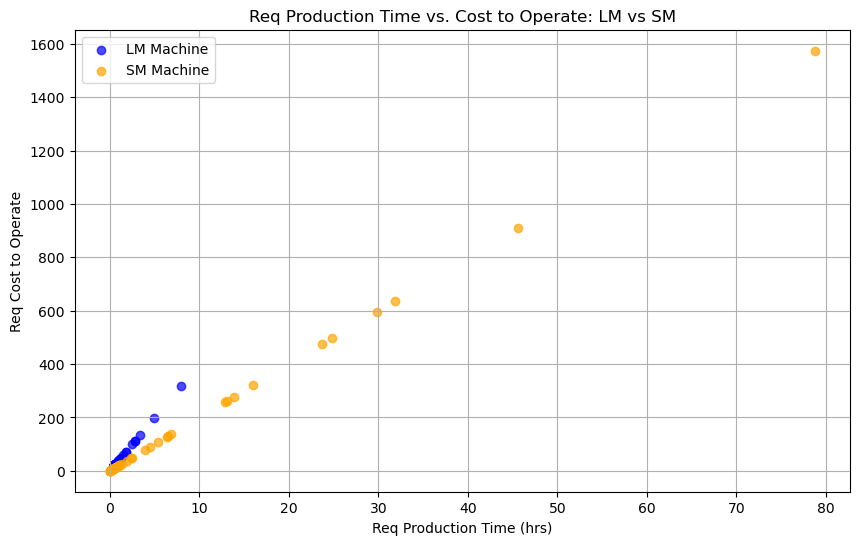

In [14]:
import matplotlib.pyplot as plt

# Scatter plot for LM vs SM
plt.figure(figsize=(10, 6))
plt.scatter(df_combined['1 LM Req Production Time (hrs)'], df_combined['1 LM Cost to Operate'], label='LM Machine', alpha=0.7, color='blue')
plt.scatter(df_combined['1 SM Req Production Time (hrs)'], df_combined['1 SM Cost to Operate'], label='SM Machine', alpha=0.7, color='orange')

# Labels and legend
plt.xlabel('Req Production Time (hrs)')
plt.ylabel('Req Cost to Operate')
plt.title('Req Production Time vs. Cost to Operate: LM vs SM')
plt.legend()
plt.grid(True)
plt.show()

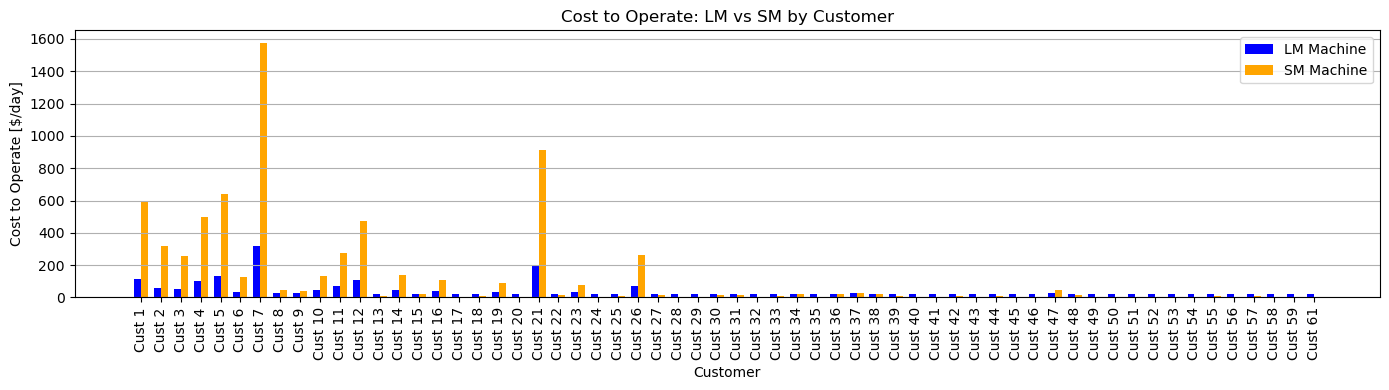

In [15]:
import numpy as np

# Bar plot for LM and SM costs
x = np.arange(len(df_combined['Customer']))  # Position for each customer
width = 0.35

plt.figure(figsize=(14, 4))
plt.bar(x - width/2, df_combined['1 LM Cost to Operate'], width, label='LM Machine', color='blue')
plt.bar(x + width/2, df_combined['1 SM Cost to Operate'], width, label='SM Machine', color='orange')

# Labels and legend
plt.xlabel('Customer')
plt.ylabel('Cost to Operate [$/day]')
plt.title('Cost to Operate: LM vs SM by Customer')
plt.xticks(x, df_combined['Customer'], rotation=90)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

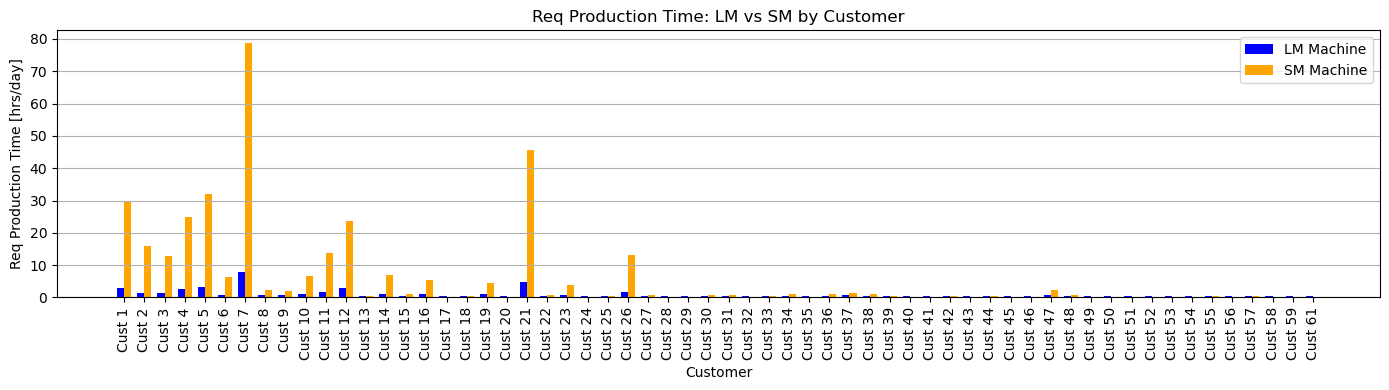

In [16]:
import numpy as np

# Bar plot for LM and SM costs
x = np.arange(len(df_combined['Customer']))  # Position for each customer
width = 0.35

plt.figure(figsize=(14, 4))
plt.bar(x - width/2, df_combined['1 LM Req Production Time (hrs)'], width, label='LM Machine', color='blue')
plt.bar(x + width/2, df_combined['1 SM Req Production Time (hrs)'], width, label='SM Machine', color='orange')

# Labels and legend
plt.xlabel('Customer')
plt.ylabel('Req Production Time [hrs/day]')
plt.title('Req Production Time: LM vs SM by Customer')
plt.xticks(x, df_combined['Customer'], rotation=90)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Cost and Time per Unit Plotting

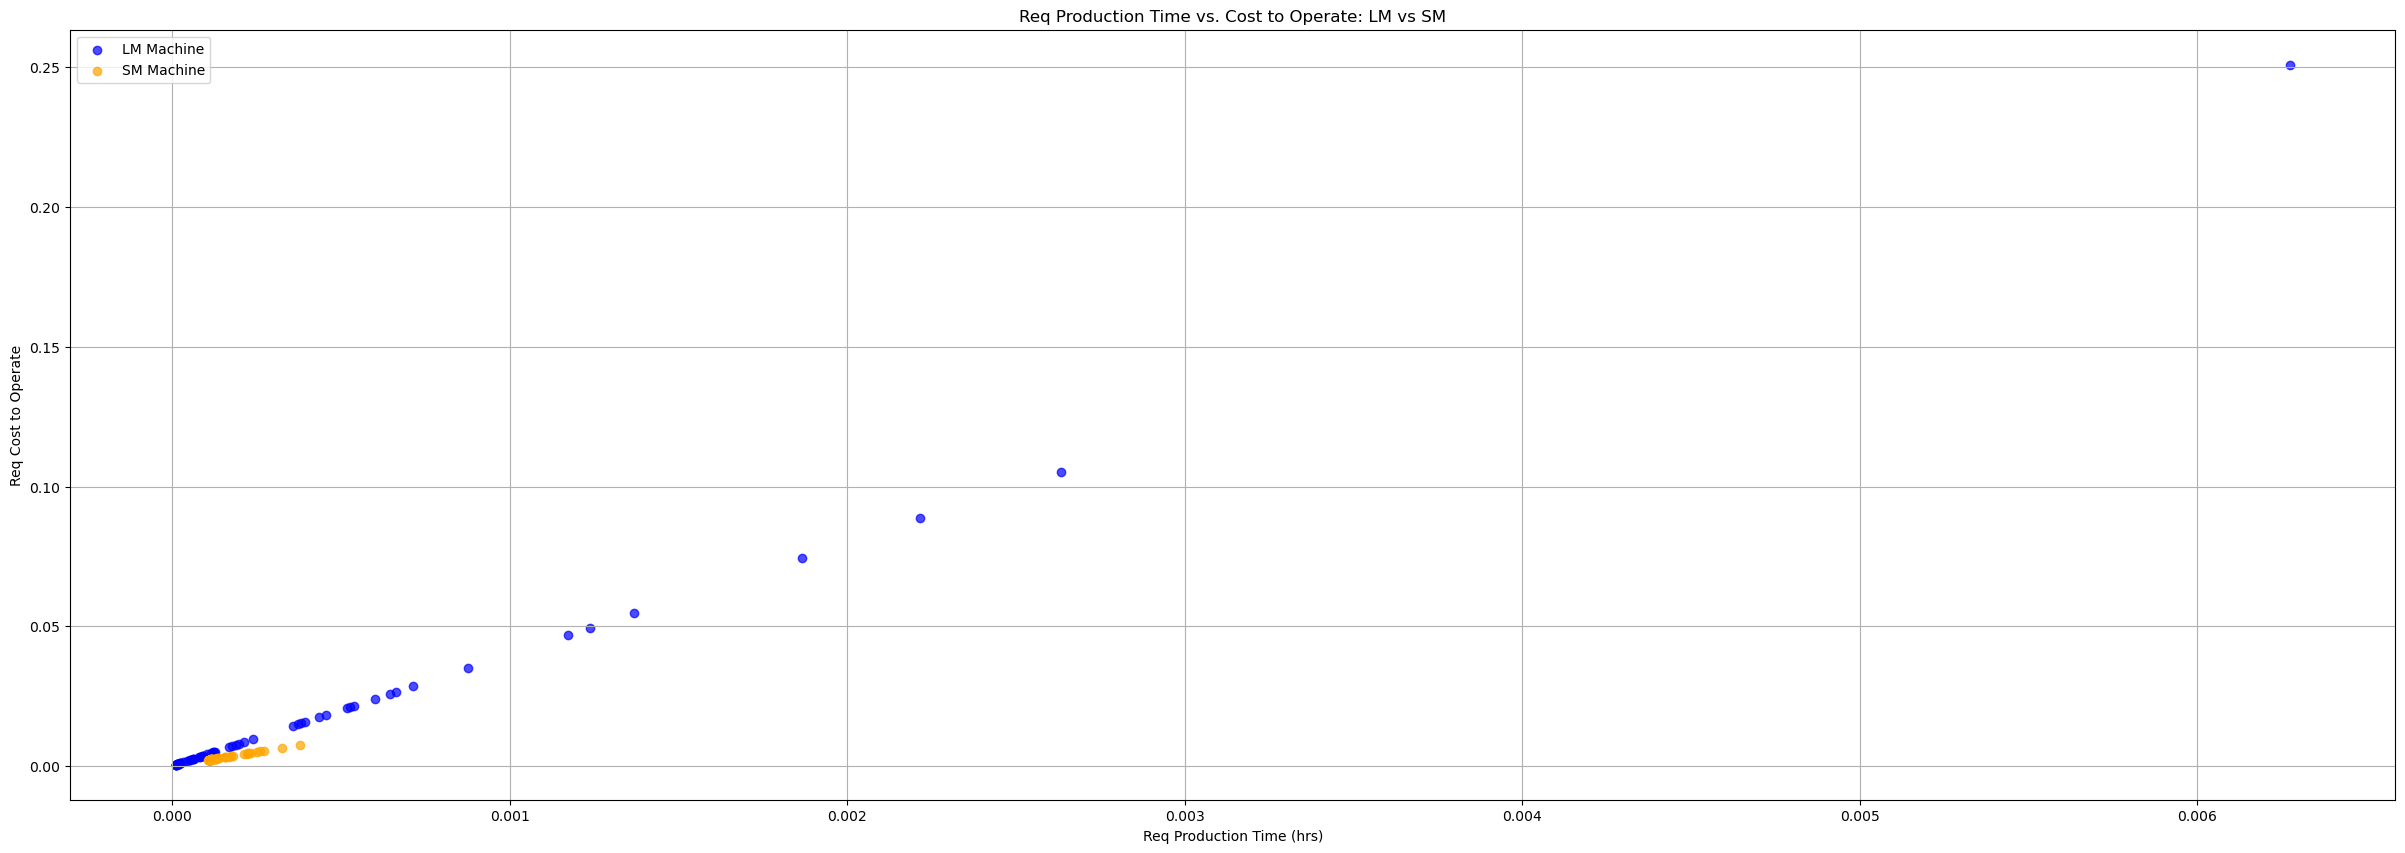

In [17]:
import matplotlib.pyplot as plt

# Scatter plot for LM vs SM
plt.figure(figsize=(30, 10))
plt.scatter(df_combined['1 LM Prod Time / Unit / Machine'], df_combined['1 LM Cost / Unit / Machine'], label='LM Machine', alpha=0.7, color='blue')
plt.scatter(df_combined['1 SM Prod Time / Unit / Machine'], df_combined['1 SM Cost / Unit / Machine'], label='SM Machine', alpha=0.7, color='orange')

# Labels and legend
plt.xlabel('Req Production Time (hrs)')
plt.ylabel('Req Cost to Operate')
plt.title('Req Production Time vs. Cost to Operate: LM vs SM')
plt.legend()
plt.grid(True)
plt.show()

# Tagging each customer with the more efficient machine for them

In [18]:
df_efficiency_pre = df_combined[['Customer','1 LM Prod Time / Unit / Machine', '1 LM Cost / Unit / Machine', '1 SM Prod Time / Unit / Machine', '1 SM Cost / Unit / Machine']]

def add_efficiency_columns(df):
    # Iterate through the rows and calculate efficiency
    def determine_efficiency(row):
        # Determine More Time Efficient Machine
        if row['1 LM Prod Time / Unit / Machine'] > row['1 SM Prod Time / Unit / Machine']:
            time_efficient = 'SM'
        else:
            time_efficient = 'LM'

        # Determine More Cost Efficient Machine
        if row['1 LM Cost / Unit / Machine'] > row['1 SM Cost / Unit / Machine']:
            cost_efficient = 'SM'
        else:
            cost_efficient = 'LM'

        return pd.Series([time_efficient, cost_efficient])

    # Apply the function to the DataFrame
    df[['More Time Efficient Machine', 'More Cost Efficient Machine']] = df.apply(determine_efficiency, axis=1)
    return df

# Apply the function to df_efficiency_pre
df_efficiency = add_efficiency_columns(df_efficiency_pre)

df_efficiency.head()

/var/folders/0w/q_gsy2xs38s4d9955d8s3gkc0000gn/T/ipykernel_71625/3947193947.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/0w/q_gsy2xs38s4d9955d8s3gkc0000gn/T/ipykernel_71625/3947193947.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Customer,1 LM Prod Time / Unit / Machine,1 LM Cost / Unit / Machine,1 SM Prod Time / Unit / Machine,1 SM Cost / Unit / Machine,More Time Efficient Machine,More Cost Efficient Machine
0,Cust 1,0.000013,0.000506,0.000134,0.002676,LM,LM
1,Cust 2,0.000016,0.000625,0.000168,0.003364,LM,LM
2,Cust 3,0.000017,0.000694,0.000180,0.003606,LM,LM
3,Cust 4,0.000013,0.000520,0.000128,0.002561,LM,LM
4,Cust 5,0.000012,0.000490,0.000116,0.002324,LM,LM


# implementing an efficiency margin limit when assigning customers to machines to try and decrease the load on Large Machines

In [19]:
df_efficiency_test = df_efficiency_pre.copy()

def calculate_margins_by_customer(df):
    # Calculate the margins
    df['Time Margin'] = abs(df['1 LM Prod Time / Unit / Machine'] - df['1 SM Prod Time / Unit / Machine'])
    df['Cost Margin'] = abs(df['1 LM Cost / Unit / Machine'] - df['1 SM Cost / Unit / Machine'])

    # Create a new DataFrame with only the relevant columns
    df_margins = df[['Customer', 'Time Margin', 'Cost Margin']].copy()

    return df_margins

df_margins = calculate_margins_by_customer(df_efficiency_test)

avg_time_margin = df_margins['Time Margin'].median()
avg_cost_margin = df_margins['Cost Margin'].median()

df_margins = df_margins.sort_values(by='Time Margin', ascending=False)
display(df_margins)

def add_efficiency_columns_with_limits(df, time_limit, cost_limit):
    # Iterate through the rows and calculate efficiency
    def determine_efficiency(row):
        # Calculate margins
        time_margin = abs(row['1 LM Prod Time / Unit / Machine'] - row['1 SM Prod Time / Unit / Machine'])
        cost_margin = abs(row['1 LM Cost / Unit / Machine'] - row['1 SM Cost / Unit / Machine'])
        
        # Determine More Time Efficient Machine with margin consideration
        if row['1 LM Prod Time / Unit / Machine'] > row['1 SM Prod Time / Unit / Machine']:
            time_efficient = 'SM' if time_margin > time_limit else 'LM'
        else:
            time_efficient = 'LM' if time_margin > time_limit else 'SM'
        
        # Determine More Cost Efficient Machine with margin consideration
        if row['1 LM Cost / Unit / Machine'] > row['1 SM Cost / Unit / Machine']:
            cost_efficient = 'SM' if cost_margin > cost_limit else 'LM'
        else:
            cost_efficient = 'LM' if cost_margin > cost_limit else 'SM'

        return pd.Series([time_efficient, cost_efficient, time_margin, cost_margin])

    # Apply the function to the DataFrame
    df[['More Time Efficient Machine', 'More Cost Efficient Machine', 
        'Time Margin', 'Cost Margin']] = df.apply(determine_efficiency, axis=1)
    return df


time_limit = avg_time_margin  # Example time margin limit
cost_limit = 0 # Example cost margin limit
df_efficiency_w_limits = add_efficiency_columns_with_limits(df_efficiency_test, time_limit, cost_limit)

display(df_efficiency_w_limits)


,Customer,Time Margin,Cost Margin
49,Cust 50,0.006023,0.245922
59,Cust 61,0.002476,0.102213
34,Cust 35,0.001994,0.084183
31,Cust 32,0.001641,0.070123
57,Cust 58,0.001232,0.052026
55,Cust 56,0.001055,0.044528
27,Cust 28,0.000965,0.044049
28,Cust 29,0.000653,0.030600
39,Cust 40,0.000534,0.023971
44,Cust 45,0.000520,0.023315


,Customer,1 LM Prod Time / Unit / Machine,1 LM Cost / Unit / Machine,1 SM Prod Time / Unit / Machine,1 SM Cost / Unit / Machine,More Time Efficient Machine,More Cost Efficient Machine,Time Margin,Cost Margin
0,Cust 1,0.000013,0.000506,0.000134,0.002676,LM,LM,0.000121,0.002171
1,Cust 2,0.000016,0.000625,0.000168,0.003364,LM,LM,0.000153,0.002739
2,Cust 3,0.000017,0.000694,0.000180,0.003606,LM,LM,0.000163,0.002912
3,Cust 4,0.000013,0.000520,0.000128,0.002561,LM,LM,0.000115,0.002041
4,Cust 5,0.000012,0.000490,0.000116,0.002324,LM,LM,0.000104,0.001834
5,Cust 6,0.000024,0.000975,0.000176,0.003513,LM,LM,0.000151,0.002538
6,Cust 7,0.000011,0.000445,0.000110,0.002201,SM,LM,0.000099,0.001756
7,Cust 8,0.000043,0.001704,0.000157,0.003136,LM,LM,0.000114,0.001433
8,Cust 9,0.000052,0.002065,0.000156,0.003113,LM,LM,0.000104,0.001049
9,Cust 10,0.000019,0.000769,0.000114,0.002281,SM,LM,0.000095,0.001513


# Assigning each customer to a machine to find overall demand per machine type and eventually quantities of machines

In [20]:
df_assignments_temp = df_combined[['Customer', '1 LM Req Production Time (hrs)','1 LM Cost to Operate', '1 SM Req Production Time (hrs)','1 SM Cost to Operate']]
df_assignments_temp = df_assignments_temp.merge(df_efficiency_w_limits[['Customer', 'More Time Efficient Machine', 'More Cost Efficient Machine']], on='Customer')

df_assignments_temp.head()

# Function to filter and transform the DataFrame
def create_filtered_dataframe(df):
    # Initialize a new DataFrame to store the results
    filtered_data = []

    # Iterate through each row
    for _, row in df.iterrows():
        if row['More Time Efficient Machine'] == 'LM':
            filtered_data.append({
                'Customer': row['Customer'],
                'Machine': 'LM',
                'Required Production Time': row['1 LM Req Production Time (hrs)'],
                'Operating Cost': row['1 LM Cost to Operate']
            })
        elif row['More Time Efficient Machine'] == 'SM':
            filtered_data.append({
                'Customer': row['Customer'],
                'Machine': 'SM',
                'Required Production Time': row['1 SM Req Production Time (hrs)'],
                'Operating Cost': row['1 SM Cost to Operate']
            })

    # Create a new DataFrame from the filtered data
    return pd.DataFrame(filtered_data)

# Apply the function to the DataFrame
df_assignments= create_filtered_dataframe(df_assignments_temp)

# Calculate the sum for rows with LM in the Machine column
LM_daily_prod_time = df_assignments[df_assignments['Machine'] == 'LM']['Required Production Time'].sum().round(2)

# Calculate the sum for rows with SM in the Machine column
SM_daily_prod_time = df_assignments[df_assignments['Machine'] == 'SM']['Required Production Time'].sum().round(2)

LM_daily_op_cost = df_assignments[df_assignments['Machine'] == 'LM']['Operating Cost'].sum().round(2)
SM_daily_op_cost = df_assignments[df_assignments['Machine'] == 'SM']['Operating Cost'].sum().round(2)

# Print the results
print(f"Total Daily Required Production Time for LM: {LM_daily_prod_time} hrs/day")
print(f"Total Daily Required Production Time for SM: {SM_daily_prod_time} hrs/day")
print(f"Total Daily Operating Cost for LM: ${LM_daily_op_cost}/day")
print(f"Total Daily Operating Cost for SM: ${SM_daily_op_cost}/day")

display(df_assignments)

Total Daily Required Production Time for LM: 17.89 hrs/day
Total Daily Required Production Time for SM: 217.25 hrs/day
Total Daily Operating Cost for LM: $715.6/day
Total Daily Operating Cost for SM: $4345.0/day


,Customer,Machine,Required Production Time,Operating Cost
0,Cust 1,LM,2.82,112.8
1,Cust 2,LM,1.49,59.6
2,Cust 3,LM,1.24,49.6
3,Cust 4,LM,2.52,100.8
4,Cust 5,LM,3.36,134.4
5,Cust 6,LM,0.88,35.2
6,Cust 7,SM,78.72,1574.4
7,Cust 8,LM,0.66,26.4
8,Cust 9,LM,0.63,25.2
9,Cust 10,SM,6.53,130.6


# Linear Plots of using all Large Machines, all Small Machines, and the combination we calculated based off of efficiency

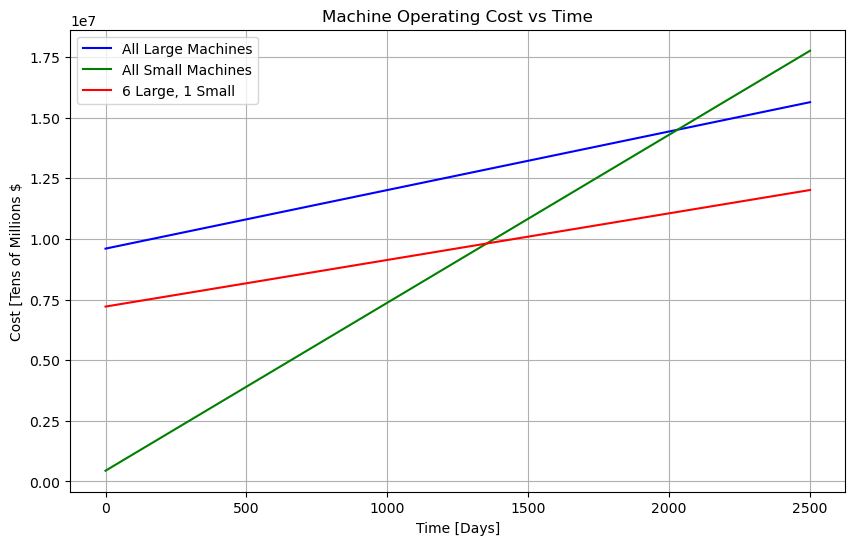

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Define the x values
x = np.linspace(0, 2500, 500)

# Define the y values for each equation
y1 = 9600000 + 2416 * x
y2 = 440000 + 6929 * x
y3 = 7210000 + 1923 * x

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each line
plt.plot(x, y1, label=r'All Large Machines', color='blue')
plt.plot(x, y2, label=r'All Small Machines', color='green')
plt.plot(x, y3, label=r'6 Large, 1 Small', color='red')

# Add labels and title
plt.xlabel('Time [Days]')
plt.ylabel('Cost [Tens of Millions $')
plt.title('Machine Operating Cost vs Time')

# Display the legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()
